In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

RDKit WARNING: [21:36:10] Enabling RDKit 2019.09.3 jupyter extensions


loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.SuperSet'> dataset created...
test loss: 4.412985145431204
y_pred:
tensor([[ 5.4306],
        [ 1.6733],
        [ 5.3702],
        [-1.1373],
        [-0.3065],
        [ 2.8888],
        [ 2.4753],
        [ 4.4991],
        [ 5.2804],
        [ 4.8125]], device='cuda:0')
 y:
tensor([[ 5.1431e+00],
        [ 5.1396e-01],
        [ 6.0498e+00],
        [-9.9477e-01],
        [-4.2489e+00],
        [ 1.6608e-01],
        [ 2.6901e+01],
        [ 7.8457e+00],
        [-2.9326e-01],
        [ 1.4314e-02]], device='cuda:0')


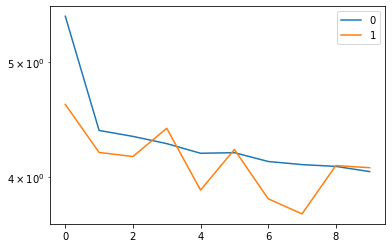

learning time: 0:08:23.652000


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+15+128+32+64+32+64, 'H': 8192, 'D_out': 1, 'model_name': 'funnel'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','mulliken','A','B','C','mu','alpha','homo',
                           'lumo','gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': False,
                 'use_h5': False,  
                 'infer': False}
crit_params = {'reduction': 'sum'}
ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}
sample_params = {'split': .1, 'subset': .01}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=32, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/champs/'+'train.csv', header=0, names=['id','molecule_name', 
                 'atom_index_0','atom_index_1','type','scalar_coupling_constant'], index_col=False)

In [7]:
df.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


In [24]:
mn = df.groupby('type')['scalar_coupling_constant'].mean()
ct = df.groupby('type')['scalar_coupling_constant'].count()
dt = df.groupby('type')['scalar_coupling_constant'].describe()

In [22]:
mn

type
1JHC    94.976153
1JHN    47.479884
2JHC    -0.270624
2JHH   -10.286605
2JHN     3.124754
3JHC     3.688470
3JHH     4.771023
3JHN     0.990730
Name: scalar_coupling_constant, dtype: float64

In [23]:
ct

type
1JHC     709416
1JHN      43363
2JHC    1140674
2JHH     378036
2JHN     119253
3JHC    1510379
3JHH     590611
3JHN     166415
Name: scalar_coupling_constant, dtype: int64

In [25]:
dt

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
1JHC,709416.0,94.976153,18.277237,66.60080,84.023000,88.223650,100.735000,204.8800
1JHN,43363.0,47.479884,10.922172,24.32220,36.496800,47.789400,57.053100,80.4187
2JHC,1140674.0,-0.270624,4.523611,-36.21860,-2.226068,-0.949123,0.870188,42.8192
2JHH,378036.0,-10.286605,3.979607,-35.17610,-12.026800,-11.328700,-9.643585,11.8542
2JHN,119253.0,3.124754,3.673474,-2.62085,0.190584,2.018590,5.276480,17.7436
3JHC,1510379.0,3.688470,3.070907,-18.58210,1.311865,2.880310,5.672480,76.0437
3JHH,590611.0,4.771023,3.704984,-3.02046,2.047675,3.691440,7.333505,17.4841
3JHN,166415.0,0.990730,1.315393,-3.17241,0.106232,0.658849,1.435225,10.9712


In [27]:
df = pd.read_csv('./data/champs/'+'test.csv', header=0, names=['id','molecule_name', 
                   'atom_index_0','atom_index_1','type'], index_col=False)

In [29]:
df.head(20)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC
5,4658152,dsgdb9nsd_000015,3,0,1JHC
6,4658153,dsgdb9nsd_000015,3,2,3JHC
7,4658154,dsgdb9nsd_000015,3,4,2JHH
8,4658155,dsgdb9nsd_000015,3,5,2JHH
9,4658156,dsgdb9nsd_000015,4,0,1JHC


In [30]:
df.shape

(2505542, 5)